In [3]:
import os
import sys

import numpy as np

## Plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl

## For colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable

## Get physical constants from Scipy
import scipy.constants as con

## For fitting
import scipy.optimize as opt

## For matlab loading
import scipy.io as sio

misloc_pack_path = os.path.join(
    os.path.sep,
    'Users',
    'chair',
    'Documents',
    'Academia',
    'SuperRes',
    'Biteen_colab',
    'Mispolarization',
    'python',
#     'gitted',
    )

sys.path.append(misloc_pack_path)
## Load custom package modules
from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit
from misloc_mispol_package.calc import coupled_dipoles as cd
from misloc_mispol_package.optics import diffraction_int as diffi
from misloc_mispol_package.optics import fibonacci as fib

In [4]:
## Parameter setting needs to be in cell following mpl import for some reason 
## https://github.com/jupyter/notebook/issues/3385
##
## Default parameters inspired by 
## http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 200,  # to adjust notebook inline plot size
    'savefig.dpi': 200,  # to adjust notebook inline plot size
#     'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
#     'savefig.dpi': 150,  # to adjust notebook inline plot size
    'axes.labelsize': 10, # fontsize for x and y labels (was 10)
    'axes.titlesize': 10,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.39, 2.10],
    'font.family': 'serif',
    'figure.max_open_warning':10001
}
mpl.rcParams.update(params)

In [5]:

## Some useful numerical constants
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m

m_per_nm = fit.m_per_nm

eps_b = 1.778 ## Water
cm_per_nm = 1E-7


Load disk spectrum

In [6]:
df_640 = sio.loadmat(
    "/Users/chair/Documents/Academia/SuperRes/Biteen_colab/"+
    "from_Biteen_group/sandwiched_nanodisk/harrison 101120 df/df_640.mat"
    )
df_598 = sio.loadmat(
    "/Users/chair/Documents/Academia/SuperRes/Biteen_colab/"+
    "from_Biteen_group/sandwiched_nanodisk/harrison 101120 df/df_598.mat"
    )
df_609 = sio.loadmat(
    "/Users/chair/Documents/Academia/SuperRes/Biteen_colab/"+
    "from_Biteen_group/sandwiched_nanodisk/harrison 101120 df/df_609.mat"
    )
wavelength_vector = sio.loadmat(
    "/Users/chair/Documents/Academia/SuperRes/Biteen_colab/"+
    "from_Biteen_group/sandwiched_nanodisk/harrison 101120 df/wavelength vector.mat"
    )

In [7]:
lambda_nm = wavelength_vector['wl'].ravel()

In [8]:
df_spec_640 = df_640['DF'][:, 0]
df_spec_609 = df_609['DF'][:, 0]
df_spec_598 = df_598['DF'][:, 0]

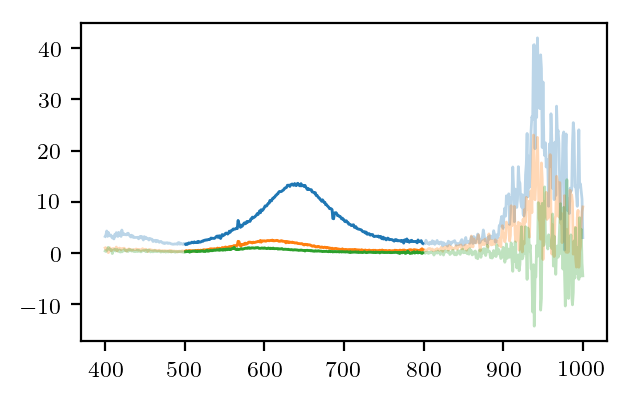

In [9]:
spectrum_idx_OI = np.argwhere(
    np.logical_and(
        lambda_nm<800,
        lambda_nm>500)
        )
fig_kwargs = {'lw':1}
plt.plot(lambda_nm, df_spec_640, **fig_kwargs, alpha=.3, c='C0') 
plt.plot(lambda_nm[spectrum_idx_OI], df_spec_640[spectrum_idx_OI], **fig_kwargs, c='C0')

plt.plot(lambda_nm, df_spec_609, **fig_kwargs, alpha=.3, c='C1') 
plt.plot(lambda_nm[spectrum_idx_OI], df_spec_609[spectrum_idx_OI], **fig_kwargs, c='C1')

plt.plot(lambda_nm, df_spec_598, **fig_kwargs, alpha=.3, c='C2') 
plt.plot(lambda_nm[spectrum_idx_OI], df_spec_598[spectrum_idx_OI], **fig_kwargs, c='C2')
# plt.ylim(
#     np.min(df_spec_640.T[1, spectrum_idx_OI])-.5,
#     np.max(df_spec_640.T[1, spectrum_idx_OI])+.5,
#     )
    

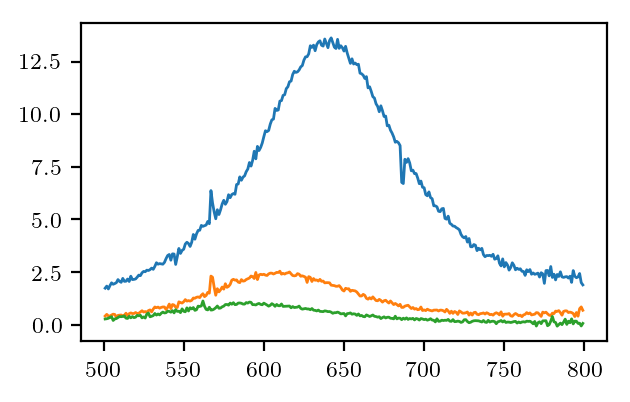

In [10]:
spectrum_idx_OI = np.argwhere(
    np.logical_and(
        lambda_nm<800,
        lambda_nm>500)
        )
fig_kwargs = {'lw':1}
# plt.plot(lambda_nm, df_spec_640, **fig_kwargs, alpha=.3, c='C0') 
plt.plot(lambda_nm[spectrum_idx_OI], df_spec_640[spectrum_idx_OI], **fig_kwargs, c='C0')

# plt.plot(lambda_nm, df_spec_609, **fig_kwargs, alpha=.3, c='C1') 
plt.plot(lambda_nm[spectrum_idx_OI], df_spec_609[spectrum_idx_OI], **fig_kwargs, c='C1')

# plt.plot(lambda_nm, df_spec_598, **fig_kwargs, alpha=.3, c='C2') 
plt.plot(lambda_nm[spectrum_idx_OI], df_spec_598[spectrum_idx_OI], **fig_kwargs, c='C2')


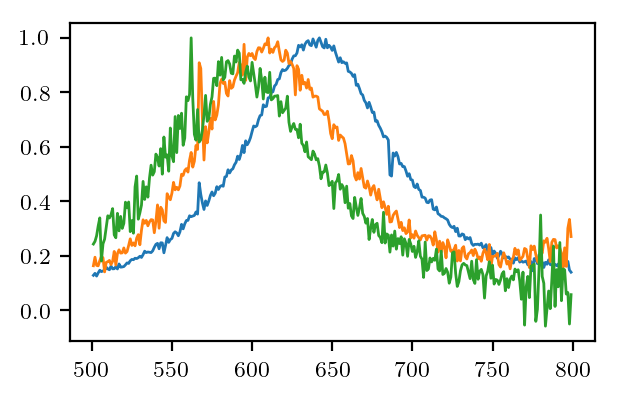

In [11]:
spectrum_idx_OI = np.argwhere(
    np.logical_and(
        lambda_nm<800,
        lambda_nm>500)
        )
fig_kwargs = {'lw':1}
norm = lambda x: x/x.max()
# plt.plot(lambda_nm, df_spec_640, **fig_kwargs, alpha=.3, c='C0') 
plt.plot(lambda_nm[spectrum_idx_OI], norm(df_spec_640[spectrum_idx_OI]), **fig_kwargs, c='C0')

# plt.plot(lambda_nm, df_spec_609, **fig_kwargs, alpha=.3, c='C1') 
plt.plot(lambda_nm[spectrum_idx_OI], norm(df_spec_609[spectrum_idx_OI]), **fig_kwargs, c='C1')

# plt.plot(lambda_nm, df_spec_598, **fig_kwargs, alpha=.3, c='C2') 
plt.plot(lambda_nm[spectrum_idx_OI], norm(df_spec_598[spectrum_idx_OI]), **fig_kwargs, c='C2')


In [12]:
## DEFINE BACKGROUND FOR FITS
eps_water = 1.778 ## approximately water. 
# eps_b=2

In [13]:
1.4**2

1.9599999999999997

# Try fixing gold parameters and fitting background and geometry

## Compare raw to the ripped data for curiosity
Not sure what happened to the rip, but data in Curly's thesis does look a bit different. 

In [30]:
diskrip_70nm = np.loadtxt("ripped_data/70 nm disk.csv", delimiter=',')
diskrip_76nm = np.loadtxt("ripped_data/76 nm disk.csv", delimiter=',')
diskrip_86nm = np.loadtxt("ripped_data/86 nm disk.csv", delimiter=',')

In [17]:
diskrip_70nm = diskrip_70nm[np.argsort(diskrip_70nm[:, 0])]
diskrip_76nm = diskrip_76nm[np.argsort(diskrip_76nm[:, 0])]
diskrip_86nm = diskrip_86nm[np.argsort(diskrip_86nm[:, 0])]

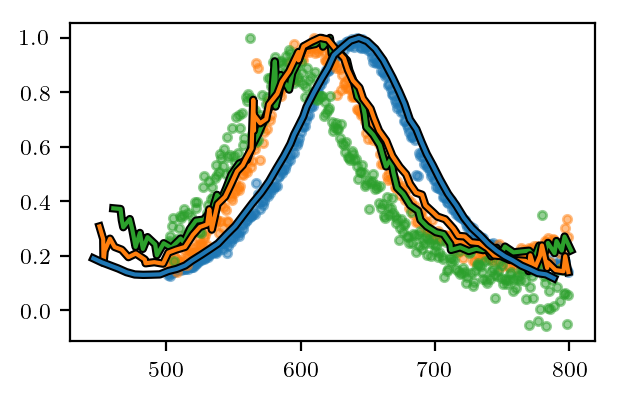

In [18]:
plt.plot(lambda_nm[spectrum_idx_OI], norm(df_spec_640[spectrum_idx_OI]), ls='', marker='.', alpha=.5, c='C0')
plt.plot(lambda_nm[spectrum_idx_OI], norm(df_spec_609[spectrum_idx_OI]), ls='', marker='.', alpha=.5, c='C1')
plt.plot(lambda_nm[spectrum_idx_OI], norm(df_spec_598[spectrum_idx_OI]), ls='', marker='.', alpha=.5, c='C2')

plt.plot(diskrip_70nm.T[0], norm(diskrip_70nm.T[1]), c='k', lw=3)
plt.plot(diskrip_70nm.T[0], norm(diskrip_70nm.T[1]), c='C2')
plt.plot(diskrip_76nm.T[0], norm(diskrip_76nm.T[1]), c='k', lw=3)
plt.plot(diskrip_76nm.T[0], norm(diskrip_76nm.T[1]), c='C1')
plt.plot(diskrip_86nm.T[0], norm(diskrip_86nm.T[1]), c='k', lw=3)
plt.plot(diskrip_86nm.T[0], norm(diskrip_86nm.T[1]), c='C0')


In [77]:
def ret_fit_scat_1(hbarw, eps_inf, hbarw_p, hbargamma, height, diameter, eps_b=None):
    
    if eps_b is None:
        eps_b = eps_water
        
#     print(f'eps_b = {eps_b}')
    
    a_x = height / 2
    a_yz = diameter / 2
    
    return cd.long_sigma_scat_ret_pro_ellip(
        w=hbarw/hbar, 
        eps_inf=eps_inf, 
        w_p=hbarw_p/hbar, 
        gamma=hbargamma/hbar, 
        eps_b=eps_b, 
        a_x=a_x*m_per_nm, 
        a_yz=a_yz*m_per_nm)

#+++++++++++++++++++++++++++++++++++++++++++++
def oblate_cost_func(params, *args):
    x=args[0]
    y=args[1]

    
#     eps_inf=params[0]
#     w_p=params[1]
#     gamma=params[2]
#     a_x = params[3]
#     a_yz = params[4]
    
    y_normed = y/y.max()
    yfit_normed = oblate_fit_result(x, params)

    low_energy_forgiveness = np.ones(x.shape) - (x<1.6) * .1
    return (y_normed-yfit_normed).ravel()*low_energy_forgiveness.ravel()

def oblate_fit_result(x, params):
    
    amp = params[-1]
    phys_params = params[:-1]
    
    yfit=ret_fit_scat_1(x, *phys_params)
    
    return yfit/yfit.max() * amp

In [123]:
#+++++++++++++++++++++++++++++++++++++++++++++
def tipple_fit__cost_func(params, *args, **kwargs):
    """ Eneter data in expanded form:
        *args = [x_70, y_70, x_76, ... ]
        """
    ## ~~~~~~~~
    ## energies
    x_70 = args[0]
    x_76 = args[2]
    x_86 = args[4]
    ## Datas
    y_70 = args[1]
    y_76 = args[3]
    y_86 = args[5]
    
    ## Get model spectra
    disk_70, disk_76, disk_86 = disk_specs_from_params(params, x_70, x_76, x_86)
    
    if 'cuttoff' in kwargs:
        cuttoff = kwargs['cuttoff']
    else:
        cuttoff = 520
        
    if 'stretch_model' in kwargs:
        if kwargs['stretch_model']:

            disk_70 = (disk_70 - disk_70.min())
            disk_70 /= disk_70.max()

            disk_76 = (disk_76 - disk_76.min())
            disk_76 /= disk_76.max()

            disk_86 = (disk_86 - disk_86.min())
            disk_86 /= disk_86.max()
        
    model__minus__data = np.concatenate((
        (
            (disk_70 - y_70)
            *(1240/x_70>cuttoff)
            ), 
        (
            (disk_76 - y_76)
            *(1240/x_76>cuttoff)
            ), 
        (
            (disk_86 - y_86)
            *(1240/x_86>cuttoff)
            )))    
    
    
    return (model__minus__data).ravel()


def disk_specs_from_params(params, x_70, x_76=None, x_86=None):
    ## Params are 
    ## params[0] : common eps_b
    ## params[1] : common height
    ## params[2] : diameter 1
    ## params[3] : diameter 2
    ## params[4] : diameter 3
    ## params[5] : amp 1
    ## params[6] : amp 2
    ## params[7] : amp 3
    params_70 = [*params[0:2], params[2], params[5],]
    params_76 = [*params[0:2], params[3], params[6],]
    params_86 = [*params[0:2], params[4], params[7],]
    
    disk_70 = fixed_gold__oblate_fit_result(x_70, params_70)
    disk_76 = fixed_gold__oblate_fit_result(x_76, params_76)
    disk_86 = fixed_gold__oblate_fit_result(x_86, params_86)
    
    return disk_70, disk_76, disk_86


def fixed_gold__oblate_fit_result(x, params):
    eps_b = params[0] 
    height = params[1]
    diameter = params[2]
    amp = params[3]
    ## fixed params (from nrod paper)
    eps_inf = 28.9857
    hwp = 13.5885
    hgam = 0.0977
    amp = params[-1]
    phys_params = params[:-1]
    
    yfit=ret_fit_scat_1(
        hbarw=x, 
        eps_inf=eps_inf, 
        hbarw_p=hwp, 
        hbargamma=hgam, 
        height=height, 
        diameter=diameter, 
        eps_b=eps_b)
    
    return norm(yfit + amp)

In [138]:
    
#+++++++++++++++++++++++++++++++++++++++++++++
# params0 =  np.array([1.4**2,  60.17293345, 90, 106, 116,  0.94467404, 0.94467404, 0.94467404])
params0 =  np.array([  1.331**2,  39.38588524,  99.77250258, 113.01124729,
       125.51810473,   0,   0,  0 ])
args = (
    1240/lambda_nm[spectrum_idx_OI], 
    norm(df_spec_598[spectrum_idx_OI]),
    1240/lambda_nm[spectrum_idx_OI], 
    norm(df_spec_609[spectrum_idx_OI]),
    1240/lambda_nm[spectrum_idx_OI], 
    norm(df_spec_640[spectrum_idx_OI]),)

result = opt.least_squares(
    tipple_fit__cost_func, 
    params0, 
    ftol=1e-15,
    xtol=1e-15, 
    gtol=1e-15, 
    args=args,
    kwargs={'cuttoff':450},
    bounds=(
        [1.33**2, 20, 60, 60, 60, 0, 0, 0],
        [1.6**2, 80, 150, 150, 150, 1, 1, 1],
        ),
    x_scale=[.1, 30, 80, 80, 80, .01, .01, .01],
    )

#+++++++++++++++++++++++++++++++++++++++++++++
tripple_fit__params = result['x']
(disk_70nm__fit_spec, disk_76nm__fit_spec, disk_86nm__fit_spec) = disk_specs_from_params(
    tripple_fit__params, 
    x_70=1240/lambda_nm[spectrum_idx_OI], 
    x_76=1240/lambda_nm[spectrum_idx_OI], 
    x_86=1240/lambda_nm[spectrum_idx_OI],)

(disk_70nm__ini_gue, disk_76nm__ini_gue, disk_86nm__ini_gue) = disk_specs_from_params(
    params0, 
    x_70=1240/lambda_nm[spectrum_idx_OI], 
    x_76=1240/lambda_nm[spectrum_idx_OI], 
    x_86=1240/lambda_nm[spectrum_idx_OI],)



In [139]:
tripple_fit__params

array([1.77121539e+00, 4.31043220e+01, 9.91105228e+01, 1.08428389e+02,
       1.20321818e+02, 6.38756172e-11, 8.12563315e-11, 4.69983001e-11])

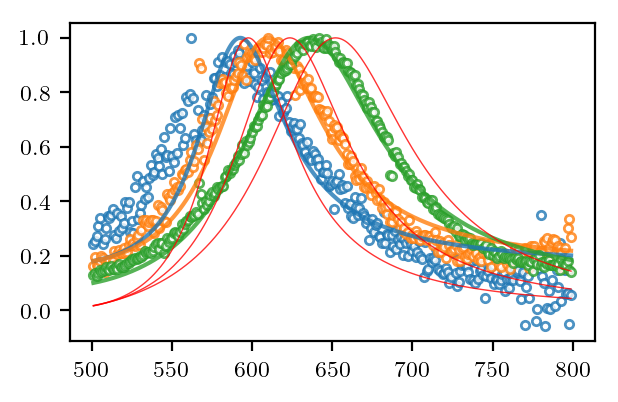

In [140]:
plt.plot(lambda_nm[spectrum_idx_OI], norm(df_spec_598[spectrum_idx_OI]), ls='', marker='o', markersize=3, markerfacecolor='w', alpha=.8)
plt.plot(lambda_nm[spectrum_idx_OI], norm(df_spec_609[spectrum_idx_OI]), ls='', marker='o', markersize=3, markerfacecolor='w', alpha=.8)
plt.plot(lambda_nm[spectrum_idx_OI], norm(df_spec_640[spectrum_idx_OI]), ls='', marker='o', markersize=3, markerfacecolor='w', alpha=.8)

plt.plot(lambda_nm[spectrum_idx_OI], norm(disk_70nm__fit_spec), alpha=.8, c='C0')
plt.plot(lambda_nm[spectrum_idx_OI], norm(disk_76nm__fit_spec), alpha=.8, c='C1')
plt.plot(lambda_nm[spectrum_idx_OI], norm(disk_86nm__fit_spec), alpha=.8, c='C2')

plt.plot(lambda_nm[spectrum_idx_OI], norm(disk_70nm__ini_gue), alpha=.8, c='red', lw=.5)
plt.plot(lambda_nm[spectrum_idx_OI], norm(disk_76nm__ini_gue), alpha=.8, c='red', lw=.5)
plt.plot(lambda_nm[spectrum_idx_OI], norm(disk_86nm__ini_gue), alpha=.8, c='red', lw=.5)

In [141]:
tripple_fit__params

array([1.77121539e+00, 4.31043220e+01, 9.91105228e+01, 1.08428389e+02,
       1.20321818e+02, 6.38756172e-11, 8.12563315e-11, 4.69983001e-11])

In [143]:
np.sqrt(tripple_fit__params[0])

1.3308701609278288

In [145]:
radii = tripple_fit__params[1:5]/2
radii

array([21.55216099, 49.55526139, 54.21419433, 60.16090909])